# Scrapping data

## Get Content HTML

In [46]:
!pip install requests

In [47]:
import requests

Get content from the web

In [48]:
page = requests.get("https://sidata-ptn.ltmpt.ac.id/ptn_sn.php?ptn=361")

Check Status Code (check at : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)

In [49]:
page.status_code

200

Cek konten yang telah di download

In [50]:
print(page.content)

b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <title>DAYA TAMPUNG</title>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="description" content="">\n    <meta name="author" content="">\n\n    <!-- Le styles -->\n\t<link rel="stylesheet" href="css/site.min.css">\n\t<script src="js/jquery.js"></script>\n\t<script src="js/bootstrap.min.js"></script>\n    <style type="text/css">\n      body {\n        padding-top: 60px;\n        padding-bottom: 40px;\n      }\n      .sidebar-nav {\n        padding: 9px 0;\n      }\n    </style>\n    <!--<link href="css/bootstrap-responsive.css" rel="stylesheet">-->\n\n    <!-- HTML5 shim, for IE6-8 support of HTML5 elements -->\n    <!--[if lt IE 9]>\n      <script src="http://html5shim.googlecode.com/svn/trunk/html5.js"></script>\n    <![endif]-->\n\n    <!-- Fav and touch icons -->\n    \n    </head>\n    <body>\n\t<div class="navbar navbar-fixed-top navbar-inverse t-navbar" rol

##Start parsing the HTML content

In [51]:
from bs4 import BeautifulSoup

Parsing the HTML document via the BeautifulSoup object using "lxml" parser

In [52]:
#Start Parsing using "lxml" parser
soup = BeautifulSoup(page.content, 'lxml')

Cek Hasil Parsing yang telah dilakukan

In [53]:
# Prettify format from parsing
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   DAYA TAMPUNG
  </title>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="" name="description"/>
  <meta content="" name="author"/>
  <!-- Le styles -->
  <link href="css/site.min.css" rel="stylesheet"/>
  <script src="js/jquery.js">
  </script>
  <script src="js/bootstrap.min.js">
  </script>
  <style type="text/css">
   body {
        padding-top: 60px;
        padding-bottom: 40px;
      }
      .sidebar-nav {
        padding: 9px 0;
      }
  </style>
  <!--<link href="css/bootstrap-responsive.css" rel="stylesheet">-->
  <!-- HTML5 shim, for IE6-8 support of HTML5 elements -->
  <!--[if lt IE 9]>
      <script src="http://html5shim.googlecode.com/svn/trunk/html5.js"></script>
    <![endif]-->
  <!-- Fav and touch icons -->
 </head>
 <body>
  <div class="navbar navbar-fixed-top navbar-inverse t-navbar" role="navigation">
   <div class="container">
    <div class="

##Inspect Element form Web and extract the content

In [54]:
# Search the table and extract the table
table = soup.find('div', attrs={'id': 'jenis1'})

In [55]:
print(table)

<div class="tab-pane fade in active " id="jenis1">
<br/>
<table class="table table-striped vtop">
<thead>
<tr>
<th>NO</th>
<th>KODE</th>
<th>NAMA</th>
<th class="ri">JENJANG</th>
<th class="ri">DAYA TAMPUNG 2022</th>
<th class="ri">PEMINAT 2021</th>
<th class="ri">JENIS PORTOFOLIO</th>
<!--<th>SYARAT SMTA</th>
                                            <th>SYARAT FISIK</th> -->
</tr>
</thead>
<tbody>
<tr class="">
<td>1</td>
<td>3611526</td>
<td><a href="?ptn=361&amp;prodi=3611526&amp;jenis=0">MANAJEMEN INFORMASI KESEHATAN</a></td>
<td class="ri">D4</td>
<td class="ri">18</td>
<td class="ri">
                                                                                                        309
                                                </td>
<td align="right">Tidak Ada</td>
<!--<td align="right"><a href="#slta" class="slta"></a></td>-->
<!--<td align="right"> -- </td>-->
</tr>
<tr class="">
<td>2</td>
<td>3611534</td>
<td><a href="?ptn=361&amp;prodi=3611534&amp;jenis=0">TEKN

##CREATE A COLUMN LIST

In [56]:
# Obtain every title of columns with tag <th>
headers = []
for i in table.find_all("th"):
 title = i.text
 headers.append(title)

In [57]:
print(headers)

['NO', 'KODE', 'NAMA', 'JENJANG', 'DAYA TAMPUNG 2022', 'PEMINAT 2021', 'JENIS PORTOFOLIO']


CREATE A DATA FRAME

In [58]:
import pandas as pd

In [59]:
# Create a dataframe
mydata = pd.DataFrame(columns = headers)

CREATE A FOR LOOP TO FILL DATAFRAME

In [60]:
# Create a for loop to fill mydata
for j in table.find_all("tr")[1:]:
 row_data = j.find_all("td")
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row

In [61]:
mydata

,NO,KODE,NAMA,JENJANG,DAYA TAMPUNG 2022,PEMINAT 2021,JENIS PORTOFOLIO
0,1,3611526,MANAJEMEN INFORMASI KESEHATAN,D4,18,\n ...,Tidak Ada
1,2,3611534,TEKNOLOGI REKAYASA PERANGKAT LUNAK,D4,29,\n ...,Tidak Ada
2,3,3611542,TEKNOLOGI REKAYASA ELEKTRO,D4,22,\n ...,Tidak Ada
3,4,3611557,TEKNOLOGI REKAYASA INSTRUMENTASI DAN KONTROL,D4,15,\n ...,Tidak Ada
4,5,3611565,TEKNOLOGI REKAYASA INTERNET,D4,29,\n ...,Tidak Ada
...,...,...,...,...,...,...,...
56,57,3611484,KEHUTANAN,S1,75,\n ...,Tidak Ada
57,58,3611492,TEKNOLOGI INFORMASI,S1,33,\n ...,Tidak Ada
58,59,3611503,ILMU AKTUARIA,S1,15,\n ...,Tidak Ada
59,60,3611511,TEKNIK BIOMEDIS,S1,18,\n ...,Tidak Ada


Check Data Types

In [62]:
mydata.dtypes

NO                   object
KODE                 object
NAMA                 object
JENJANG              object
DAYA TAMPUNG 2022    object
PEMINAT 2021         object
JENIS PORTOFOLIO     object
dtype: object

In [63]:
mydata["PEMINAT 2021"]=mydata["PEMINAT 2021"].str.replace('.','',regex=True)

In [64]:
mydata["DAYA TAMPUNG 2022"] = mydata["DAYA TAMPUNG 2022"].astype(float)
mydata["PEMINAT 2021"] = mydata["PEMINAT 2021"].astype(float)

In [65]:
mydata.dtypes

NO                    object
KODE                  object
NAMA                  object
JENJANG               object
DAYA TAMPUNG 2022    float64
PEMINAT 2021         float64
JENIS PORTOFOLIO      object
dtype: object

Check Data Akhir

In [66]:
mydata

,NO,KODE,NAMA,JENJANG,DAYA TAMPUNG 2022,PEMINAT 2021,JENIS PORTOFOLIO
0,1,3611526,MANAJEMEN INFORMASI KESEHATAN,D4,18.0,309.0,Tidak Ada
1,2,3611534,TEKNOLOGI REKAYASA PERANGKAT LUNAK,D4,29.0,173.0,Tidak Ada
2,3,3611542,TEKNOLOGI REKAYASA ELEKTRO,D4,22.0,95.0,Tidak Ada
3,4,3611557,TEKNOLOGI REKAYASA INSTRUMENTASI DAN KONTROL,D4,15.0,28.0,Tidak Ada
4,5,3611565,TEKNOLOGI REKAYASA INTERNET,D4,29.0,75.0,Tidak Ada
...,...,...,...,...,...,...,...
56,57,3611484,KEHUTANAN,S1,75.0,449.0,Tidak Ada
57,58,3611492,TEKNOLOGI INFORMASI,S1,33.0,771.0,Tidak Ada
58,59,3611503,ILMU AKTUARIA,S1,15.0,280.0,Tidak Ada
59,60,3611511,TEKNIK BIOMEDIS,S1,18.0,218.0,Tidak Ada


# K Mean Klustering

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})

## EDA

Top 5 DAYA TAMPUNG 2022

In [68]:
df2 =  mydata[["NAMA","DAYA TAMPUNG 2022"]]
df2 =  df2.sort_values(by=["DAYA TAMPUNG 2022"], ascending=False)
df2 =  df2.head()

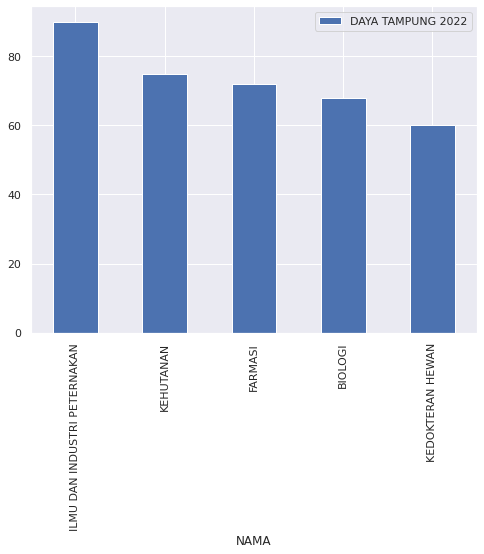

In [69]:
df2.plot(x="NAMA",y="DAYA TAMPUNG 2022",kind="bar")

TOP 5 Peminat 2021

In [70]:
df3 =  mydata[["NAMA","PEMINAT 2021"]]
df3 =  df3.sort_values(by=["PEMINAT 2021"], ascending=False)
df3 =  df3.head()

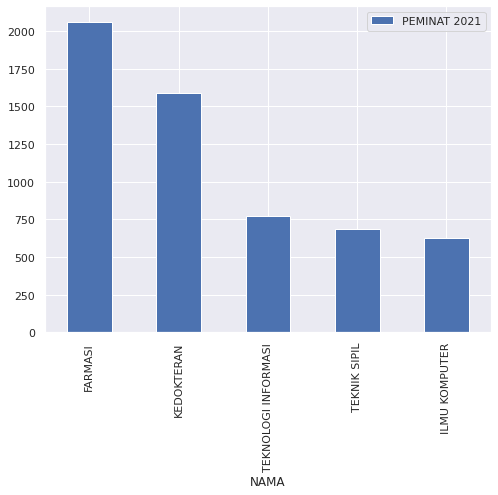

In [71]:
df3.plot(x="NAMA",y="PEMINAT 2021",kind="bar")

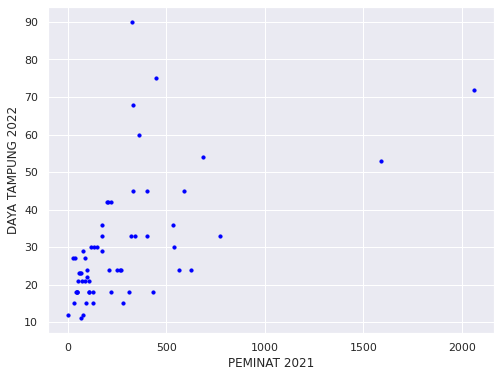

In [72]:
plt.scatter(mydata["PEMINAT 2021"] , mydata["DAYA TAMPUNG 2022"], s =10, c = 'blue')
plt.xlabel("PEMINAT 2021")
plt.ylabel("DAYA TAMPUNG 2022")
plt.show()

## Missing value and outlier checking

cara 1

In [73]:
import missingno as msno
%matplotlib inline

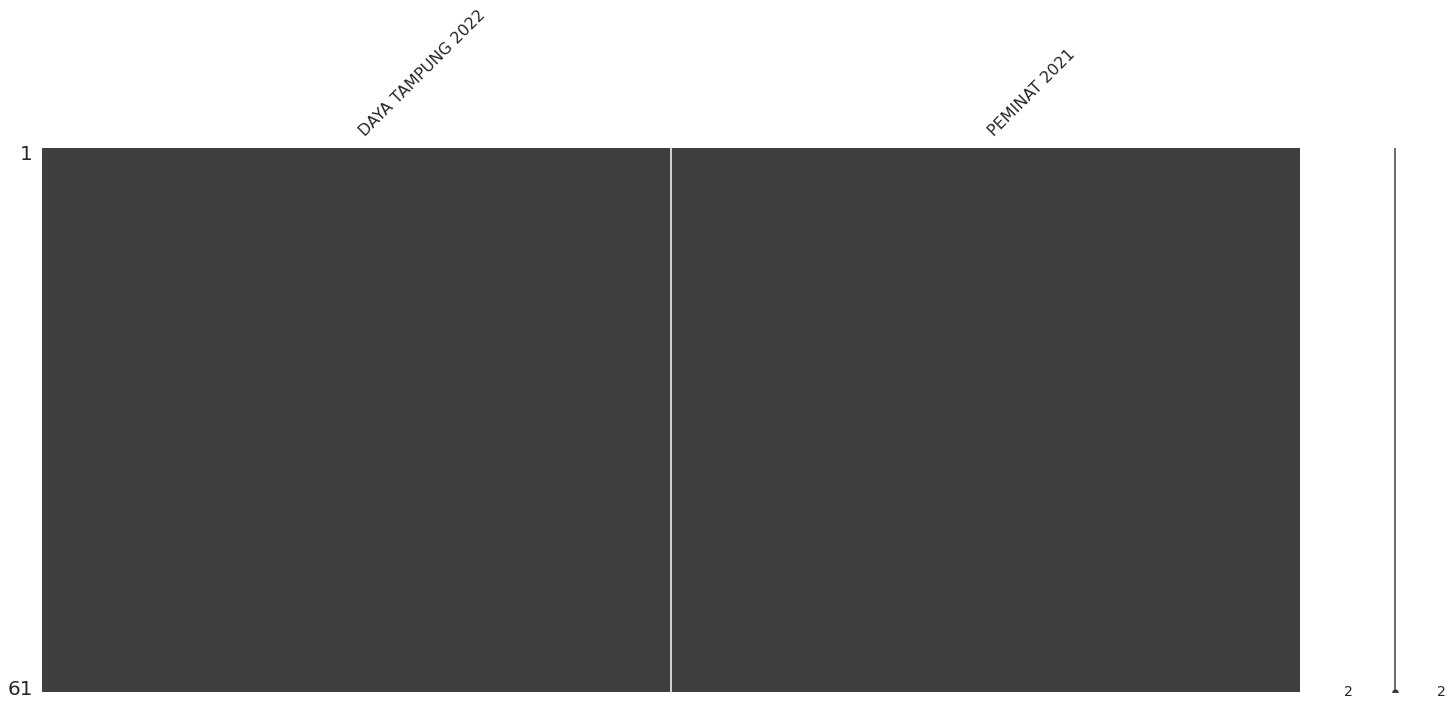

In [74]:
# Gives positional information of the missing values
msno.matrix(mydata[{'DAYA TAMPUNG 2022','PEMINAT 2021'}])

cara 2

In [75]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      mydata.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 NO                   0
KODE                 0
NAMA                 0
JENJANG              0
DAYA TAMPUNG 2022    0
PEMINAT 2021         0
JENIS PORTOFOLIO     0
dtype: int64


Boxplot Daya Tampung 2022

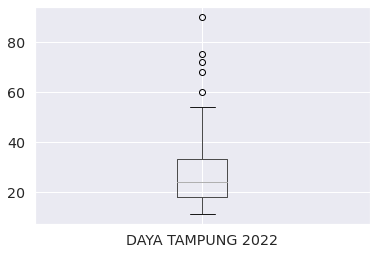

In [76]:
sns.set(font_scale=1.3)
mydata.boxplot(column = ['DAYA TAMPUNG 2022'])

Boxplot Peminat 2021

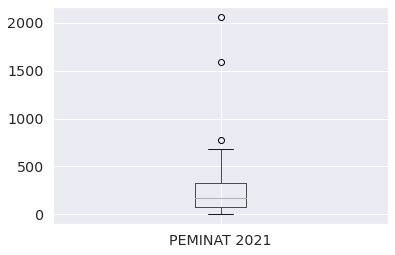

In [77]:
sns.set(font_scale=1.3)
mydata.boxplot(column = ['PEMINAT 2021'])

## Uji Asumsi

In [78]:
data_cluster = mydata[["DAYA TAMPUNG 2022","PEMINAT 2021"]]

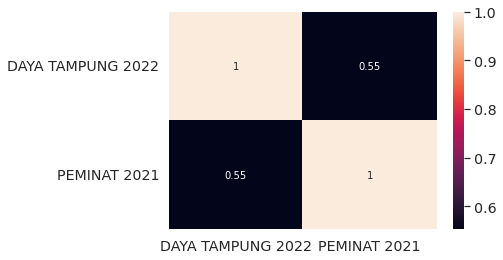

In [79]:
%matplotlib inline
correlation = mydata.corr()
sns.heatmap(correlation,annot=True)

In [80]:
#No multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = mydata[["DAYA TAMPUNG 2022","PEMINAT 2021"]].columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(mydata[["DAYA TAMPUNG 2022","PEMINAT 2021"]].values, i)
                          for i in range(len(mydata[["DAYA TAMPUNG 2022","PEMINAT 2021"]].columns))]
  
print(vif_data)

             feature       VIF
0  DAYA TAMPUNG 2022  2.338802
1       PEMINAT 2021  2.338802


## KMeans

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [82]:
range_n_clusters = [ 3, 4, 5, 6, 7, 8]
silhouette_avg = []
bestsilhoutte = 0

In [83]:
for num_clusters in range_n_clusters:
 
 # initialise KMeans
 kmeans = KMeans(init="random", n_clusters=num_clusters, n_init=10, max_iter=300,random_state=42)
 #fit the clusters 
 kmeans.fit(data_cluster)
 clusters = kmeans.labels_
 print(num_clusters)
 
 # silhouette score
 score = silhouette_score(data_cluster, clusters, metric='euclidean')
 print('Silhouetter Score: %.3f' % score)
 silhouette_avg.append(score)

 if score > bestsilhoutte:
   bestclusters = clusters
   bestsilhoutte = score

3
Silhouetter Score: 0.642
4
Silhouetter Score: 0.624
5
Silhouetter Score: 0.564
6
Silhouetter Score: 0.548
7
Silhouetter Score: 0.505
8
Silhouetter Score: 0.500


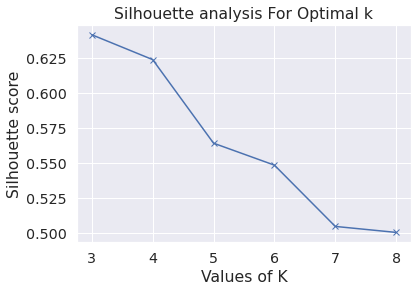

In [84]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [85]:
data_result_kmeans = mydata.copy()

In [86]:
data_result_kmeans['cluster'] = bestclusters

## Hasil Cluster

In [87]:
data_result_kmeans

,NO,KODE,NAMA,JENJANG,DAYA TAMPUNG 2022,PEMINAT 2021,JENIS PORTOFOLIO,cluster
0,1,3611526,MANAJEMEN INFORMASI KESEHATAN,D4,18.0,309.0,Tidak Ada,0
1,2,3611534,TEKNOLOGI REKAYASA PERANGKAT LUNAK,D4,29.0,173.0,Tidak Ada,1
2,3,3611542,TEKNOLOGI REKAYASA ELEKTRO,D4,22.0,95.0,Tidak Ada,1
3,4,3611557,TEKNOLOGI REKAYASA INSTRUMENTASI DAN KONTROL,D4,15.0,28.0,Tidak Ada,1
4,5,3611565,TEKNOLOGI REKAYASA INTERNET,D4,29.0,75.0,Tidak Ada,1
...,...,...,...,...,...,...,...,...
56,57,3611484,KEHUTANAN,S1,75.0,449.0,Tidak Ada,0
57,58,3611492,TEKNOLOGI INFORMASI,S1,33.0,771.0,Tidak Ada,0
58,59,3611503,ILMU AKTUARIA,S1,15.0,280.0,Tidak Ada,1
59,60,3611511,TEKNIK BIOMEDIS,S1,18.0,218.0,Tidak Ada,1


In [88]:
data_result_kmeans['cluster'].value_counts()

1    41
0    18
2     2
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Daya Tampung 2022 tiap Cluster')

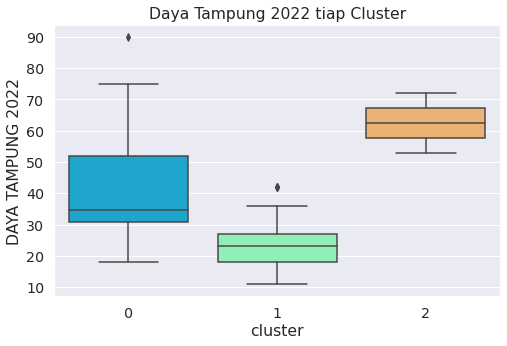

In [89]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='DAYA TAMPUNG 2022',data=data_result_kmeans, palette='rainbow')
plt.title("Daya Tampung 2022 tiap Cluster")

Text(0.5, 1.0, 'Peminat 2021 tiap Cluster')

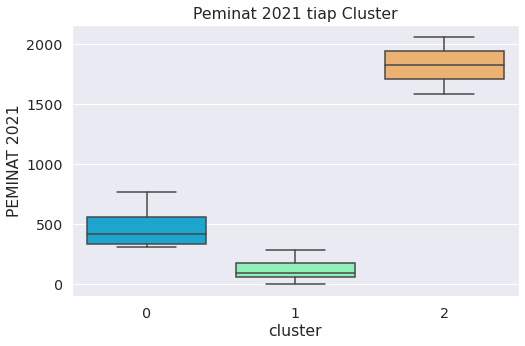

In [90]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='PEMINAT 2021',data=data_result_kmeans, palette='rainbow')
plt.title("Peminat 2021 tiap Cluster")

## Mencari Centroid dari tiap cluster

In [91]:
kmeans = KMeans(n_clusters = 3, random_state=123)

In [92]:
kmeans.fit(data_cluster)

KMeans(n_clusters=3, random_state=123)

In [93]:
print(kmeans.cluster_centers_)

[[  42.44444444  461.05555556]
 [  62.5        1824.5       ]
 [  23.36585366  118.19512195]]


Plot Hasil Clustering

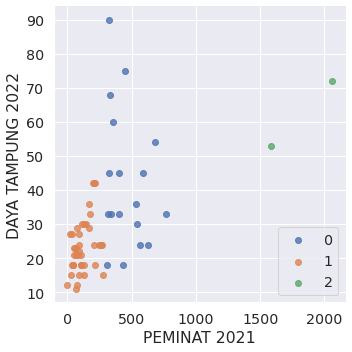

In [94]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PEMINAT 2021", y="DAYA TAMPUNG 2022", data=data_result_kmeans, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()